In [ ]:
!unzip train\ \(2\).zip

Importing necessary libraries

In [2]:
import numpy as np
import os
import cv2 as cv
import matplotlib.pyplot as plt
import keras
import xgboost as xgb
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization,Dense
from keras.models import Sequential
from sklearn.metrics import classification_report
from keras.applications.vgg16 import VGG16

In [3]:
path_dir = "/content/train"
images = []
Categories = ["bad-soya","bad-sunflower","good-soya","good-sunflower"]
for category in Categories:
  path = os.path.join(path_dir,category)
  class_num = Categories.index(category)
  for img in os.listdir(path):
    img_arr = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    re = cv.resize(img_arr,(224,224))
    images.append([re,class_num])

**Shuffling the data and normalizing the pixels**

In [4]:
np.random.shuffle(images)

In [5]:
x_data = []
y_data = []
for features,labels in images:
  x_data.append(features)
  y_data.append(labels)

In [6]:
x_data = np.array(x_data)
y_data = np.array(y_data)
x_data = x_data/255

**Model Building**

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(64 , (3,3) , input_shape=(224,224,1), activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128 , (3,3) , activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256 , (3,3) , activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(200 , activation="relu"))
model.add(Dense(4,activation="softmax"))

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2)

In [10]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [11]:
model.fit(x_train,y_train, validation_data=(x_test,y_test),batch_size=16 , epochs=30)

Epoch 1/30
72/72 [==============================] - 18s 73ms/step - loss: 0.8811 - accuracy: 0.5983 - val_loss: 0.5045 - val_accuracy: 0.8014
Epoch 2/30
72/72 [==============================] - 4s 57ms/step - loss: 0.3210 - accuracy: 0.8515 - val_loss: 0.3855 - val_accuracy: 0.8328
Epoch 3/30
72/72 [==============================] - 4s 57ms/step - loss: 0.4198 - accuracy: 0.8218 - val_loss: 0.5516 - val_accuracy: 0.7596
Epoch 4/30
72/72 [==============================] - 4s 56ms/step - loss: 0.2316 - accuracy: 0.8996 - val_loss: 0.2364 - val_accuracy: 0.8711
Epoch 5/30
72/72 [==============================] - 4s 56ms/step - loss: 0.2267 - accuracy: 0.9057 - val_loss: 0.1917 - val_accuracy: 0.9303
Epoch 6/30
72/72 [==============================] - 4s 57ms/step - loss: 0.1447 - accuracy: 0.9397 - val_loss: 0.2060 - val_accuracy: 0.9094
Epoch 7/30
72/72 [==============================] - 4s 56ms/step - loss: 0.1712 - accuracy: 0.9249 - val_loss: 0.2082 - val_accuracy: 0.9268
Epoch 8/30
7

**Testing the Model**

In [12]:
y_pred = model.predict(x_test)

9/9 [==============================] - 1s 94ms/step


In [13]:
print(classification_report(np.argmax(y_pred,axis=1),y_test))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        94
           1       0.88      1.00      0.93        21
           2       0.96      0.95      0.96       138
           3       0.97      0.88      0.92        34

    accuracy                           0.94       287
   macro avg       0.93      0.94      0.93       287
weighted avg       0.94      0.94      0.94       287



Text(0.5, 1.0, 'original_class 2')

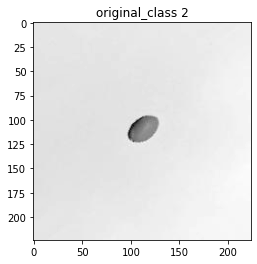

In [ ]:
plt.imshow(x_test[0],cmap='gray')
plt.title(f"original_class {y_test[0]}")

Text(0.5, 1.0, 'predicted class 2')

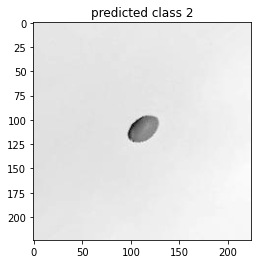

In [ ]:
plt.imshow(x_test[0], cmap='gray')
plt.title(f"predicted class {np.argmax(y_pred,axis=1)[0]}")

In [14]:
seeds = {0:"bad-soya",1:"bad-sunflower",2:"good-soya",3:"good-sunflower"}

In [21]:
def predictions(image_path,name,seeds):
  img = cv.imread(image_path,cv.IMREAD_GRAYSCALE)
  re = cv.resize(img,(224,224))
  re = re.reshape(1,224,224)
  y = model.predict(re)
  y = np.argmax(y,axis=1)
  plt.subplot(1,2,1)
  plt.imshow(img,cmap='gray')
  plt.title(name)
  plt.subplot(1,2,2)
  plt.imshow(img,cmap='gray')
  txt = seeds[int(y)]
  plt.title(f"prediction : {txt}")
  plt.show()

1/1 [==============================] - 0s 23ms/step


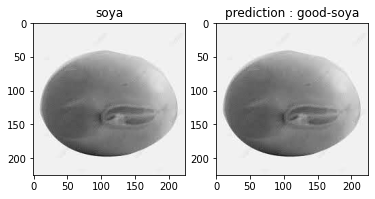

In [22]:
predictions("/content/soya.jpeg","soya",seeds)

1/1 [==============================] - 0s 32ms/step


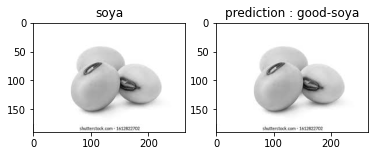

In [23]:
predictions("/content/soyaseeds.jpeg","soya",seeds)

1/1 [==============================] - 0s 19ms/step


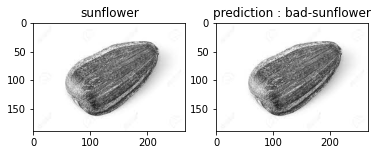

In [24]:
predictions("/content/sun flower.jpeg","sunflower",seeds)

1/1 [==============================] - 0s 20ms/step


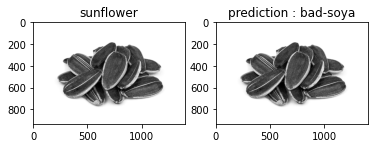

In [25]:
predictions("/content/sun seeds.webp","sunflower",seeds)